My first notebook - 
Linear regression

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math

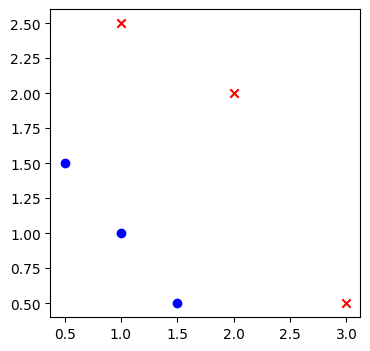

In [78]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
pos = y_train == 1
neg = y_train == 0

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker = "x", color = "red")
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker = "o", color = "blue")


In [79]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res


In [80]:
def cost_func(x, y, w, b):
    m = x.shape[0]
    res = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        res = res + y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i)
    
    res /= -(m)
    return res

In [81]:
def compute_gradient_descent(x, y, w, b):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        for j in range(n):
            dw[j] = dw[j] + (f_wb_i - y[i]) * x[i, j]
        db = db + (f_wb_i - y[i])

    dw /= m
    db /= m
    return dw, db

In [82]:
def gradient_descent(x, y, w, b, num_of_iter, alpha):
    J_history = []
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
    ax.scatter(X_train[pos, 0], X_train[pos, 1], marker = "x", color = "red")
    ax.scatter(X_train[neg, 0], X_train[neg, 1], marker = "o", color = "blue")
    ax.axis([0, 4, 0, 4])
    x0 = np.linspace(0, 5, 10)
    for i in range(num_of_iter):
        dw, db = compute_gradient_descent(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        if i < 100000:
            J_history.append(cost_func(x, y, w, b))
        if i % math.ceil(num_of_iter / 10) == 0:
            print("cost function on", i , ":", J_history[-1])
            ax.plot(x0, (-b - w[0] * x0) / w[1], color = "blue")

    return w, b, J_history

cost function on 0 : 0.684610468560574
cost function on 10000 : 0.01711604647887364
cost function on 20000 : 0.008523403979166485
cost function on 30000 : 0.005672197191107651
cost function on 40000 : 0.004250161053834308
cost function on 50000 : 0.003398230224179212
cost function on 60000 : 0.00283084256010047
cost function on 70000 : 0.002425848306579758
cost function on 80000 : 0.0021222573122028584
cost function on 90000 : 0.0018862216652143864

updated parameters: w:[8.35313087 8.15226727], b:-22.690605796630248


Text(0, 0.5, 'Cost value')

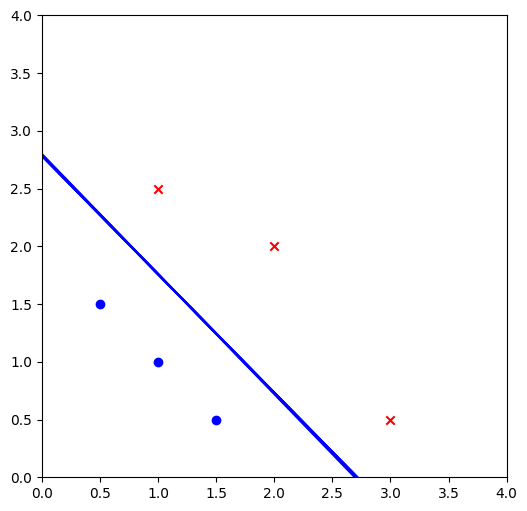

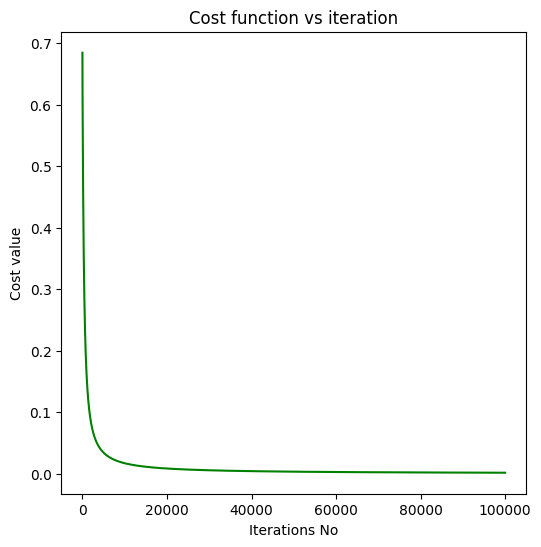

In [83]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, J_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, iters, alph) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot(np.arange(len(J_history)), J_history, color = "green")
ax.set_title("Cost function vs iteration")
ax.set_xlabel("Iterations No")
ax.set_ylabel("Cost value")
